<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Visual Behavior Neuropixels Dataset Exercises</h1> 
<h2 align="center">Summer Workshop on the Dynamic Brain</h2> 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import platform
platstring = platform.platform()

if 'Darwin' in platstring or 'macOS' in platstring:
    # macOS 
    data_root = "/Volumes/Brain2022/"
elif 'Windows' in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif 'amzn' in platstring:
    # then on AWS
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/%s/Brain2022/" % os.environ.get('USERNAME')

In [3]:
from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

# this path should point to the location of the dataset on your platform
#cache_dir = r"/Volumes/programs/mindscope/workgroups/np-behavior/vbn_data_release/vbn_s3_cache"
# cache_dir = '/home/praveen/data/vb_np_cache/'
cache_dir = '\\allen\programs\mindscope\workgroups\np-behavior\vbn_data_release\vbn_s3_cache'

cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(cache_dir=cache_dir)

/home/praveen/.anaconda3/envs/allensdk_38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<div class="alert alert-block alert-success">

## Exercise 1: Playing with the trials table and examining licking behavior

In this starter exercise, we'll practise working with the trials table and examine the licking behavior of one of the mice in the dataset. For this exercise, there are comments with detailed prompts that act as guiderails.
    
The tasks we'll undertake are:

1. Creating a new column for trial "type" (hit, miss, false alarm, etc.) in the trials table and plotting the number trials of each type.
1. Comparing lick times (from start of each trial) for hit trials and aborted trials
1. Comparing lick latency from the stimulus flash for hit, aborted and false alarm trials
1. Computing lick bouts
    
**Note:** With all of these exercises, there are multiple ways of accomplishing the same end goal. For each of the tasks in Exercise 1, we've provided prompts that take you through one logical sequence of steps to complete these analyses (which we think is simple and teaches useful concepts). The objective is to give you a relatively easy algorithm you can follow, so that you can first focus on getting used to writing pandas code. But feel free to try completing the task objectives using your own algorithm first, and consulting our prompts if you get stuck.

</div>

In [4]:
# Setup: first, let's get the relevant tables
session_id = 1065437523  # This is a good session for looking at lick behavior
session = cache.get_ecephys_session(ecephys_session_id=session_id)

stimulus_presentations = session.stimulus_presentations
trials = session.trials
licks = session.licks

/home/praveen/.anaconda3/envs/allensdk_38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


<div class="alert alert-block alert-success">

### 1.1 Creating a new column for trial "type" in the trials table, and plotting the number trials of each type

The different types of trials are: `hit`, `miss`, `false_alarm`, `correct_reject`, `aborted`, and `auto_rewarded`. Each of these trial types has a separate boolean column in the `trials` table indicating whether a particular trial is of that type. For any given trial, only one of these columns will be True, and the rest will be False.
    
We are going to convert these boolean columns into a new column in the `trials` table called `trial_type`, which contains the trial type as a string. Then, we'll create a bar plot indicating how many trials there are of each type.
    
If you want to try coming up with the logic for this on your own (i.e., without following the prompts), then this is a good point to pause, think and/or try coding.

</div>

<div class="alert alert-block alert-success">

**Prompt 1.1.a:** Create a new column called `trial_type` filled with NaNs.
    
</div>

In [5]:
trials['trial_type'] = np.nan

<div class="alert alert-block alert-success">

**Prompt 1.1.b:** Select the hit trials (rows of the trials table where the column `hit` is True), and set the `trial_type` column for those rows to be equal to the string `'hit'`.

</div>

In [6]:
trials.loc[trials['hit'] == True, 'trial_type'] = 'hit'

<div class="alert alert-block alert-success">

We'll now repeat this action for all trial types using a for loop.

**Prompt 1.1.c:** Create a python list with the names of all the different trial types (no harm in including `'hit'` again). Then, using a for loop over the list of trial types you just created, select rows of the trials table of each type, and assign the `trial_type` column for those rows to equal the name of the trial's type.

</div>

In [7]:
col_names = ['hit', 'miss', 'false_alarm', 'correct_reject', 'aborted', 'auto_rewarded']

for col in col_names:
    trials.loc[trials[col] == True, 'trial_type'] = col

In [8]:
# A more direct way to do this is to use the function idxmax: this function finds the row- or column-index
# at which the maximum of a sequence of values occurs.
# Below, we have chosen only the columns we want, and we pass axis=1 to idxmax, to take the maximum over
# columns (axis=0 would find the row-index having the maximum value for each column)
# Also note that when taking the "maximum" over boolean values, True is interpreted as 1 and False as 0,
# hence the index of the maximum occurs wherever a True is found.

# trials['trial_type'] = trials[col_names].idxmax(axis=1)

<div class="alert alert-block alert-success">

**Prompt 1.1.d:** Examine the trials table to see how that worked

</div>

In [9]:
trials

,start_time,stop_time,initial_image_name,change_image_name,stimulus_change,change_time_no_display_delay,go,catch,lick_times,response_time,...,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length,trial_type
trials_id,,,,,,,,,,,,,,,,,,,,,
0,28.08763,29.05453,im036_r,im036_r,False,NaN,False,False,"[28.55387, 28.73684, 29.30404]",NaN,...,0.000,False,False,False,False,True,False,NaN,0.96690,aborted
1,29.58829,36.86108,im036_r,im078_r,True,32.59106,False,False,"[33.04048, 33.20773, 33.30745, 33.3908, 33.507...",33.04048,...,0.005,False,False,False,False,False,True,330.0,7.27279,auto_rewarded
2,37.09446,40.78107,im078_r,im078_r,False,NaN,False,False,[40.48052],NaN,...,0.000,False,False,False,False,True,False,NaN,3.68661,aborted
3,40.84754,50.37230,im078_r,im111_r,True,46.10256,False,False,"[46.73531, 46.83539, 46.95218, 47.06898, 47.20...",46.73531,...,0.005,False,False,False,False,False,True,1140.0,9.52476,auto_rewarded
4,50.60569,51.75679,im111_r,im111_r,False,NaN,False,False,[51.43985],NaN,...,0.000,False,False,False,False,True,False,NaN,1.15110,aborted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,3587.14531,3596.66987,im012_r,im012_r,False,3592.39945,False,True,[],NaN,...,0.000,False,False,False,True,False,False,213736.0,9.52456,correct_reject
563,3596.90314,3604.17610,im012_r,im111_r,True,3599.90621,True,False,[],NaN,...,0.000,False,False,True,False,False,False,214186.0,7.27296,miss
564,3604.40941,3612.43338,im111_r,im047_r,True,3608.16308,True,False,[],NaN,...,0.000,False,False,True,False,False,False,214681.0,8.02397,miss


<div class="alert alert-block alert-success">

**Prompt 1.1.e:** Now, use the `value_counts` function on the `trials` data frame to get the number of rows having each of these trial types. Rename the output Series to `'trial_type_tally'`, which makes more sense.

</div>

In [10]:
trial_type_counts = trials['trial_type'].value_counts().rename('trial_type_tally')

<div class="alert alert-block alert-success">

**Prompt 1.1.f:** Make the index of this series a new column using `reset_index`, and rename the new column to `trial_type`.

</div>

In [11]:
trial_type_counts = trial_type_counts.reset_index().rename(columns={'index': 'trial_type'})

<div class="alert alert-block alert-success">

**Prompt 1.1.g:** Finally, plot these values using a horizontal bar plot. When using matplotlib, you can use the `plt.barh` function: supply the `y`, `width` and `tick_label` parameters. Give the plot a meaningful title.
    
</div>

Text(0.5, 1.0, 'Number of trials of each type')

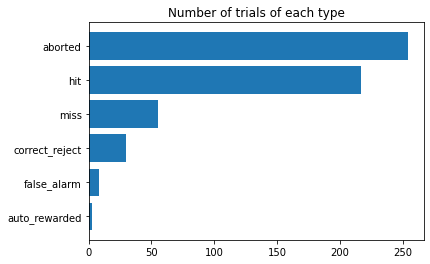

In [12]:
# Using matplotlib
plt.figure()
plt.barh(y=np.arange(len(trial_type_counts))[::-1], width=trial_type_counts['trial_type_tally'],
         tick_label=trial_type_counts['trial_type'])
plt.title('Number of trials of each type')

In [13]:
# Or, using seaborn
# plt.figure()
# sns.barplot(data=trial_type_counts, x='trial_type_tally', y='trial_type')

<div class="alert alert-block alert-success">

### 1.2 Comparing lick times for hit trials and aborted trials

Next, we'll compute the time between the start of the trial and the point at which the mouse licked, and compare this time interval across aborted trials and hit trials. To do this, we'll first create a new column in the `trials` table containing the aforementioned time interval, and then plot histograms of the time interval for hit and aborted trials.

Since the mouse correctly waited until the stimulus changed in hit trials, the wait time distribution should closely match the distribution of change times. On the other hand, the distribution of lick times should be much smaller in the case of aborted trials: but this will depend on how the mouse licked in aborted trials.

> **Note**: Do _not_ use the 'licks' _column_ from the `trials` table to get the times at which licks occurred. Use information from the `licks` _table_ instead. This is because the `trials` table contains lick timestamps as recorded by the task control computer, while the `licks` table contains lick timestamps as recorded by the lick sensor; the latter is more accurate.

If you want to try coming up with the logic for this on your own (i.e., without following the prompts), then this is a good point to pause, think and/or try coding.
    
</div>

<div class="alert alert-block alert-success">

**Prompt 1.2.a:** First, find the initial lick in each trial. The `licks` table contains a `timestamps` column that has all time instants at which the mouse licked. Use numpy's `np.searchsorted` function to find the lick timestamps that come immediately after each trial's `start_time`. Add these indices as a new column to the `trials` table called `first_lick_indices`.

</div>

In [14]:
trials['first_lick_indices'] = np.searchsorted(licks['timestamps'], trials['start_time'])

trials.head()

,start_time,stop_time,initial_image_name,change_image_name,stimulus_change,change_time_no_display_delay,go,catch,lick_times,response_time,...,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length,trial_type,first_lick_indices
trials_id,,,,,,,,,,,,,,,,,,,,,
0,28.08763,29.05453,im036_r,im036_r,False,NaN,False,False,"[28.55387, 28.73684, 29.30404]",NaN,...,False,False,False,False,True,False,NaN,0.96690,aborted,0
1,29.58829,36.86108,im036_r,im078_r,True,32.59106,False,False,"[33.04048, 33.20773, 33.30745, 33.3908, 33.507...",33.04048,...,False,False,False,False,False,True,330.0,7.27279,auto_rewarded,3
2,37.09446,40.78107,im078_r,im078_r,False,NaN,False,False,[40.48052],NaN,...,False,False,False,False,True,False,NaN,3.68661,aborted,19
3,40.84754,50.37230,im078_r,im111_r,True,46.10256,False,False,"[46.73531, 46.83539, 46.95218, 47.06898, 47.20...",46.73531,...,False,False,False,False,False,True,1140.0,9.52476,auto_rewarded,20
4,50.60569,51.75679,im111_r,im111_r,False,NaN,False,False,[51.43985],NaN,...,False,False,False,False,True,False,NaN,1.15110,aborted,34


<div class="alert alert-block alert-success">

**Prompt 1.2.b:** Now that we have the indices of rows in the `licks` table that correspond to the first lick in each trial, we can use these indices to find the _times_ at which the first licks occurred.

But, the `first_lick_indices` we have computed cannot be used directly to index the licks table because the last trial (or the last few) may have had no licks. In this case, `searchsorted` returns an index one greater than the number of rows in the licks table (to indicate that these trials started _after_ the last lick).

Examine the last few rows of the `first_lick_indices` column and you'll notice that some indices come after the last index in the `licks` table. Remove these rows and create a new dataframe of subselected trials, which only contains those `first_lick_indices` that correspond to valid licks.

</div>

In [15]:
print(trials['first_lick_indices'].tail(10))
subselected_trials = trials[trials['first_lick_indices'] < len(licks)]

subselected_trials

trials_id
557    3157
558    3158
559    3159
560    3161
561    3162
562    3162
563    3162
564    3162
565    3162
566    3162
Name: first_lick_indices, dtype: int64


,start_time,stop_time,initial_image_name,change_image_name,stimulus_change,change_time_no_display_delay,go,catch,lick_times,response_time,...,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length,trial_type,first_lick_indices
trials_id,,,,,,,,,,,,,,,,,,,,,
0,28.08763,29.05453,im036_r,im036_r,False,NaN,False,False,"[28.55387, 28.73684, 29.30404]",NaN,...,False,False,False,False,True,False,NaN,0.96690,aborted,0
1,29.58829,36.86108,im036_r,im078_r,True,32.59106,False,False,"[33.04048, 33.20773, 33.30745, 33.3908, 33.507...",33.04048,...,False,False,False,False,False,True,330.0,7.27279,auto_rewarded,3
2,37.09446,40.78107,im078_r,im078_r,False,NaN,False,False,[40.48052],NaN,...,False,False,False,False,True,False,NaN,3.68661,aborted,19
3,40.84754,50.37230,im078_r,im111_r,True,46.10256,False,False,"[46.73531, 46.83539, 46.95218, 47.06898, 47.20...",46.73531,...,False,False,False,False,False,True,1140.0,9.52476,auto_rewarded,20
4,50.60569,51.75679,im111_r,im111_r,False,NaN,False,False,[51.43985],NaN,...,False,False,False,False,True,False,NaN,1.15110,aborted,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,3560.87291,3562.77472,im083_r,im083_r,False,NaN,False,False,[3562.47435],NaN,...,False,False,False,False,True,False,NaN,1.90181,aborted,3156
557,3563.12509,3567.49553,im083_r,im083_r,False,NaN,False,False,[3567.19495],NaN,...,False,False,False,False,True,False,NaN,4.37044,aborted,3157
558,3567.62898,3569.11381,im083_r,im083_r,False,NaN,False,False,[3568.79636],NaN,...,False,False,False,False,True,False,NaN,1.48483,aborted,3158


<div class="alert alert-block alert-success">

**Prompt 1.2.c:** Use the `first_lick_indices` from the subselected trials to _index_ the timestamps column of the `licks` table; store the timestamps in a new pandas Series.

</div>

In [16]:
first_lick_timestamps = licks['timestamps'].iloc[subselected_trials['first_lick_indices']]

<div class="alert alert-block alert-success">

**Prompt 1.2.d:** By default, this Series will inherit its index from the `licks` table. Change the index of this new Series to the index of the subselected trials. This is required to add the timestamps of the first licks back to the appropriate rows of the `trials` table.

</div>

In [17]:
first_lick_timestamps.index = subselected_trials.index

<div class="alert alert-block alert-success">

**Prompt 1.2.e:** Add the new Series containing the timestamps of first licks to the `trials` table, in the form of a new column.
    
</div>

In [18]:
# Note that assignment happens using index correspondence. For trials whose index is not
# present in the Series, the 'first_lick_time' column will automatically be assigned NaN.
trials['first_lick_time'] = first_lick_timestamps
trials

,start_time,stop_time,initial_image_name,change_image_name,stimulus_change,change_time_no_display_delay,go,catch,lick_times,response_time,...,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length,trial_type,first_lick_indices,first_lick_time
trials_id,,,,,,,,,,,,,,,,,,,,,
0,28.08763,29.05453,im036_r,im036_r,False,NaN,False,False,"[28.55387, 28.73684, 29.30404]",NaN,...,False,False,False,True,False,NaN,0.96690,aborted,0,28.55104
1,29.58829,36.86108,im036_r,im078_r,True,32.59106,False,False,"[33.04048, 33.20773, 33.30745, 33.3908, 33.507...",33.04048,...,False,False,False,False,True,330.0,7.27279,auto_rewarded,3,33.02635
2,37.09446,40.78107,im078_r,im078_r,False,NaN,False,False,[40.48052],NaN,...,False,False,False,True,False,NaN,3.68661,aborted,19,40.46992
3,40.84754,50.37230,im078_r,im111_r,True,46.10256,False,False,"[46.73531, 46.83539, 46.95218, 47.06898, 47.20...",46.73531,...,False,False,False,False,True,1140.0,9.52476,auto_rewarded,20,46.71921
4,50.60569,51.75679,im111_r,im111_r,False,NaN,False,False,[51.43985],NaN,...,False,False,False,True,False,NaN,1.15110,aborted,34,51.43823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,3587.14531,3596.66987,im012_r,im012_r,False,3592.39945,False,True,[],NaN,...,False,False,True,False,False,213736.0,9.52456,correct_reject,3162,NaN
563,3596.90314,3604.17610,im012_r,im111_r,True,3599.90621,True,False,[],NaN,...,False,True,False,False,False,214186.0,7.27296,miss,3162,NaN
564,3604.40941,3612.43338,im111_r,im047_r,True,3608.16308,True,False,[],NaN,...,False,True,False,False,False,214681.0,8.02397,miss,3162,NaN


<div class="alert alert-block alert-success">

**Prompt 1.2.f:** Create a new column containing the time difference between the start of the trial and the first lick

</div>

In [19]:
trials['trial_start_to_first_lick'] = trials['first_lick_time'] - trials['start_time']

<div class="alert alert-block alert-success">

**Prompt 1.2.g:** Sub-select only the hit trials and the aborted trials.

</div>

In [20]:
hit_aborted_trials = trials[trials['hit'] | trials['aborted']]

In [21]:
hit_aborted_trials

,start_time,stop_time,initial_image_name,change_image_name,stimulus_change,change_time_no_display_delay,go,catch,lick_times,response_time,...,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length,trial_type,first_lick_indices,first_lick_time,trial_start_to_first_lick
trials_id,,,,,,,,,,,,,,,,,,,,,
0,28.08763,29.05453,im036_r,im036_r,False,NaN,False,False,"[28.55387, 28.73684, 29.30404]",NaN,...,False,False,True,False,NaN,0.96690,aborted,0,28.55104,0.46341
2,37.09446,40.78107,im078_r,im078_r,False,NaN,False,False,[40.48052],NaN,...,False,False,True,False,NaN,3.68661,aborted,19,40.46992,3.37546
4,50.60569,51.75679,im111_r,im111_r,False,NaN,False,False,[51.43985],NaN,...,False,False,True,False,NaN,1.15110,aborted,34,51.43823,0.83254
5,52.10729,53.62505,im111_r,im111_r,False,NaN,False,False,"[53.19128, 53.3242]",NaN,...,False,False,True,False,NaN,1.51776,aborted,35,53.18020,1.07291
7,62.61569,67.41981,im047_r,im047_r,False,NaN,False,False,[67.12002],NaN,...,False,False,True,False,NaN,4.80412,aborted,51,67.10305,4.48736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,3560.12217,3560.78966,im083_r,im083_r,False,NaN,False,False,"[3560.30586, 3560.47216]",NaN,...,False,False,True,False,NaN,0.66749,aborted,3154,3560.29643,0.17426
556,3560.87291,3562.77472,im083_r,im083_r,False,NaN,False,False,[3562.47435],NaN,...,False,False,True,False,NaN,1.90181,aborted,3156,3562.46780,1.59489
557,3563.12509,3567.49553,im083_r,im083_r,False,NaN,False,False,[3567.19495],NaN,...,False,False,True,False,NaN,4.37044,aborted,3157,3567.18247,4.05738


<div class="alert alert-block alert-success">

**Prompt 1.2.h:** Plot a histogram of the time from the start of the trial to the first lick, colored by trial type.
Use bins in steps of 0.75 seconds so that each histogram column represents licks within a stimulus presentation.

For plotting, you can call matplotlib's `plt.hist` function twice, once for each trial type. Supply the data, and additionally set the `bins`, `alpha` and `label` arguments. Call `plt.legend()`, which will make use of the label arguments you supplied to create a legend. Don't forget to label your x- and y-axes.
    
</div>

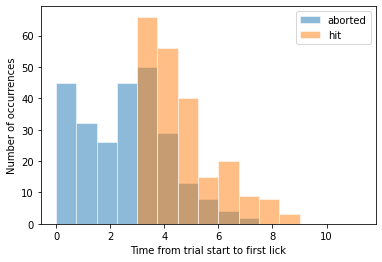

In [22]:
# Using matplotlib
plt.figure()
plt.hist(hit_aborted_trials.loc[hit_aborted_trials['aborted'], 'trial_start_to_first_lick'],
         bins=np.arange(0, 12, 0.75), alpha=0.5, edgecolor='w', label='aborted')
plt.hist(hit_aborted_trials.loc[hit_aborted_trials['hit'], 'trial_start_to_first_lick'],
         bins=np.arange(0, 12, 0.75), alpha=0.5, edgecolor='w', label='hit')
plt.xlabel('Time from trial start to first lick')
plt.ylabel('Number of occurrences')
plt.legend()

In [23]:
# Using seaborn
#plt.figure()
#sns.histplot(hit_aborted_trials, x='trial_start_to_first_lick', hue='trial_type', bins=np.arange(0, 12, 0.75))

<div class="alert alert-block alert-success">

Does anything about this plot look unusual? What sort of distribution should we have expected in aborted trials, if the mouse licked on each stimulus presentation uniformly at random?

</div>

<div class="alert alert-block alert-success">

### 1.3  Comparing lick latency from the stimulus flash for hit trials and aborted/false alarm trials

Next, we'll compare the latency between the first lick in each trial and the _preceding stimulus flash_ (rather than the start of the trial), across hit, aborted and false alarm trials.

To get information about stimulus presentations, we'll have to look at the `stimulus_presentations` table. Each stimulus presentation (i.e., flash) occurs within a trial: we'll associate each stimulus presentation to its trial, and then use the first lick times we computed in Exercise 1.2 to find the stimulus presentation preceding each lick.

For hit trials, we expect the licks to be stimulus-locked, with a response after a clear delay. If this is also true for aborted trials, it could mean that the mice are trying to use a "timing" strategy: licking after a particular number of flashes, rather than licking on the flash after the image changes.

</div>

<div class="alert alert-block alert-success">

**Prompt 1.3.a:** First, use `searchsorted` to find the trial index that starts _before_ the `start_time` of each stimulus presentation. Assign these indices to a new column of the stimulus presentation table called `trials_id`.

</div>

In [24]:
stimulus_presentations['trials_id'] = np.searchsorted(trials['start_time'],
                                                      stimulus_presentations['start_time']) - 1
# Note that searchsorted gives the trial index that has a start_time *after* each stimulus presentation.
# So we subtract one to get the trial that started *before* the stimulus presentation.

stimulus_presentations

,active,color,contrast,duration,end_frame,flashes_since_change,image_name,is_change,omitted,orientation,...,rewarded,spatial_frequency,start_frame,start_time,stimulus_block,stimulus_index,stimulus_name,stop_time,temporal_frequency,trials_id
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,True,NaN,NaN,0.250188,75,0.0,im036_r,False,False,NaN,...,False,NaN,60,28.131464,0,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,28.381652,NaN,0
1,True,NaN,NaN,0.250188,120,1.0,im036_r,False,False,NaN,...,False,NaN,105,28.882028,0,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,29.132216,NaN,0
2,True,NaN,NaN,0.250232,165,2.0,im036_r,False,False,NaN,...,False,NaN,150,29.632680,0,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,29.882912,NaN,1
3,True,NaN,NaN,0.250186,210,3.0,im036_r,False,False,NaN,...,False,NaN,195,30.383329,0,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,30.633515,NaN,1
4,True,NaN,NaN,0.250229,255,4.0,im036_r,False,False,NaN,...,False,NaN,240,31.133886,0,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,31.384115,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13386,False,NaN,NaN,0.250210,522917,1.0,im012_r,False,False,NaN,...,False,NaN,522902,8780.488196,5,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,8780.738406,NaN,566
13387,False,NaN,NaN,0.250212,522962,2.0,im012_r,False,False,NaN,...,False,NaN,522947,8781.238826,5,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,8781.489039,NaN,566
13388,False,NaN,NaN,0.250212,523007,3.0,im012_r,False,False,NaN,...,False,NaN,522992,8781.989464,5,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,8782.239676,NaN,566


<div class="alert alert-block alert-success">

**Prompt 1.3.b:** Next, merge the `stimulus_presentations` table with the `trials` table using the newly created `trials_id` column.

While merging, note that both the `stimulus_presentations` table and the `trials` table have some columns of the same name, e.g., `start_time`. To distinguish these columns after merging, use the `suffixes` argument. The default suffixes are `('_x', '_y')`, but it's better to rename them to be more meaningful.

</div>

In [25]:
stim_pres_with_trials = stimulus_presentations.merge(trials, how='left', on='trials_id',
                                                     suffixes=('_stim', '_trial'))

<div class="alert alert-block alert-success">

**Prompt 1.3.c:** Print out the columns of the merged table to check that everything is there.

</div>

In [26]:
print(stim_pres_with_trials.columns)
stim_pres_with_trials

Index(['active', 'color', 'contrast', 'duration', 'end_frame',
       'flashes_since_change', 'image_name', 'is_change', 'omitted',
       'orientation', 'position_x', 'position_y', 'rewarded',
       'spatial_frequency', 'start_frame', 'start_time_stim', 'stimulus_block',
       'stimulus_index', 'stimulus_name', 'stop_time_stim',
       'temporal_frequency', 'trials_id', 'start_time_trial',
       'stop_time_trial', 'initial_image_name', 'change_image_name',
       'stimulus_change', 'change_time_no_display_delay', 'go', 'catch',
       'lick_times', 'response_time', 'reward_time', 'reward_volume', 'hit',
       'false_alarm', 'miss', 'correct_reject', 'aborted', 'auto_rewarded',
       'change_frame', 'trial_length', 'trial_type', 'first_lick_indices',
       'first_lick_time', 'trial_start_to_first_lick'],
      dtype='object')


,active,color,contrast,duration,end_frame,flashes_since_change,image_name,is_change,omitted,orientation,...,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length,trial_type,first_lick_indices,first_lick_time,trial_start_to_first_lick
0,True,NaN,NaN,0.250188,75,0.0,im036_r,False,False,NaN,...,False,False,True,False,NaN,0.96690,aborted,0,28.55104,0.46341
1,True,NaN,NaN,0.250188,120,1.0,im036_r,False,False,NaN,...,False,False,True,False,NaN,0.96690,aborted,0,28.55104,0.46341
2,True,NaN,NaN,0.250232,165,2.0,im036_r,False,False,NaN,...,False,False,False,True,330.0,7.27279,auto_rewarded,3,33.02635,3.43806
3,True,NaN,NaN,0.250186,210,3.0,im036_r,False,False,NaN,...,False,False,False,True,330.0,7.27279,auto_rewarded,3,33.02635,3.43806
4,True,NaN,NaN,0.250229,255,4.0,im036_r,False,False,NaN,...,False,False,False,True,330.0,7.27279,auto_rewarded,3,33.02635,3.43806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13386,False,NaN,NaN,0.250210,522917,1.0,im012_r,False,False,NaN,...,True,False,False,False,215671.0,8.75813,miss,3162,NaN,NaN
13387,False,NaN,NaN,0.250212,522962,2.0,im012_r,False,False,NaN,...,True,False,False,False,215671.0,8.75813,miss,3162,NaN,NaN
13388,False,NaN,NaN,0.250212,523007,3.0,im012_r,False,False,NaN,...,True,False,False,False,215671.0,8.75813,miss,3162,NaN,NaN
13389,False,NaN,NaN,0.250210,523052,4.0,im012_r,False,False,NaN,...,True,False,False,False,215671.0,8.75813,miss,3162,NaN,NaN


<div class="alert alert-block alert-success">

**Prompt 1.3.d:** Now that we have all the info we need, subselect the hit, false alarm and aborted trials.

</div>

In [27]:
stim_pres_hit_fa_aborted = stim_pres_with_trials[stim_pres_with_trials['trial_type'].isin(['hit', 'false_alarm', 'aborted'])]

<div class="alert alert-block alert-success">

**Prompt 1.3.e:** Next, select the stimulus presentations that precede the first lick timestamp, and create a copy of the returned data frame. We need to call `.copy()` after selecting to prevent the `SettingWithCopy` warning later.

</div>

In [28]:
stim_pres_prec_first_lick = stim_pres_hit_fa_aborted[stim_pres_hit_fa_aborted['start_time_stim']
                                                     < stim_pres_hit_fa_aborted['first_lick_time']].copy()

stim_pres_prec_first_lick.head()

,active,color,contrast,duration,end_frame,flashes_since_change,image_name,is_change,omitted,orientation,...,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length,trial_type,first_lick_indices,first_lick_time,trial_start_to_first_lick
0,True,NaN,NaN,0.250188,75,0.0,im036_r,False,False,NaN,...,False,False,True,False,NaN,0.96690,aborted,0,28.55104,0.46341
12,True,NaN,NaN,0.250222,615,6.0,im078_r,False,False,NaN,...,False,False,True,False,NaN,3.68661,aborted,19,40.46992,3.37546
13,True,NaN,NaN,0.250222,660,7.0,im078_r,False,False,NaN,...,False,False,True,False,NaN,3.68661,aborted,19,40.46992,3.37546
14,True,NaN,NaN,0.250203,705,8.0,im078_r,False,False,NaN,...,False,False,True,False,NaN,3.68661,aborted,19,40.46992,3.37546
15,True,NaN,NaN,NaN,750,8.0,omitted,False,True,NaN,...,False,False,True,False,NaN,3.68661,aborted,19,40.46992,3.37546


<div class="alert alert-block alert-success">

To find the stimulus presentation *just* before the first lick timestamp, we can group the data frame (of all stimulus presentations preceding the first lick timestamp) by trial index and select the stimulus presentation with the largest stimulus presentation index.

**Prompt 1.3.f:** First, create a new column called `stim_id` to contain the stimulus presentation index (move the index to a column using `reset_index`).

</div>

In [29]:
temp_df = stim_pres_prec_first_lick.reset_index().rename(columns={'index': 'stim_id'})

<div class="alert alert-block alert-success">

**Prompt 1.3.g:** Then, group rows by `trials_id`, and find the maximum `stim_id` in each trial.
    
The resulting data frame will associate every trial with a `stim_id`, which is the last stimulus presentation preceding the first lick in that trial.

</div>

In [30]:
last_stim_id_in_each_trial = temp_df[['stim_id', 'trials_id']].groupby('trials_id').agg('max')
last_stim_id_in_each_trial

,stim_id
trials_id,
0,0
2,16
4,31
5,33
7,51
...,...
555,4705
556,4708
557,4714


<div class="alert alert-block alert-success">

**Prompt 1.3.h:** Now, choose those rows from the merged `stimulus_presentation`-`trials` table that have these `stim_id`s.

</div>

In [31]:
stim_pres_prec_first_lick = stim_pres_prec_first_lick.loc[last_stim_id_in_each_trial['stim_id']]

<div class="alert alert-block alert-success">

**Prompt 1.3.i:** Finally, compute the latency between the first lick in each trial and the start of the preceding stimulus flash. Add this to a new column.

</div>

In [32]:
stim_pres_prec_first_lick['lick_latency'] = (stim_pres_prec_first_lick['first_lick_time']
                                             - stim_pres_prec_first_lick['start_time_stim'])
stim_pres_prec_first_lick.head()

,active,color,contrast,duration,end_frame,flashes_since_change,image_name,is_change,omitted,orientation,...,correct_reject,aborted,auto_rewarded,change_frame,trial_length,trial_type,first_lick_indices,first_lick_time,trial_start_to_first_lick,lick_latency
0,True,NaN,NaN,0.250188,75,0.0,im036_r,False,False,NaN,...,False,True,False,NaN,0.96690,aborted,0,28.55104,0.46341,0.419576
16,True,NaN,NaN,0.250186,795,9.0,im078_r,False,False,NaN,...,False,True,False,NaN,3.68661,aborted,19,40.46992,3.37546,0.328376
31,True,NaN,NaN,0.250232,1470,7.0,im111_r,False,False,NaN,...,False,True,False,NaN,1.15110,aborted,34,51.43823,0.83254,0.037282
33,True,NaN,NaN,0.250193,1560,9.0,im111_r,False,False,NaN,...,False,True,False,NaN,1.51776,aborted,35,53.18020,1.07291,0.277977
51,True,NaN,NaN,NaN,2370,10.0,omitted,False,True,NaN,...,False,True,False,NaN,4.80412,aborted,51,67.10305,4.48736,0.689461


<div class="alert alert-block alert-success">

**Prompt 1.3.j:** Plot a histogram of lick latencies, colored by trial type.

</div>

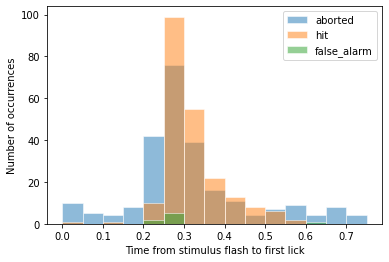

In [33]:
# Using matplotlib
plt.figure()
for trial_type in ['aborted', 'hit', 'false_alarm']:
    plt.hist(stim_pres_prec_first_lick.loc[stim_pres_prec_first_lick[trial_type], 'lick_latency'],
             bins=np.linspace(0, 0.75, 16), alpha=0.5, edgecolor='w', label=trial_type)
plt.xlabel('Time from stimulus flash to first lick')
plt.ylabel('Number of occurrences')
plt.legend()

# Using seaborn
#plt.figure()
#sns.histplot(stim_pres_prec_first_lick, x='lick_latency', hue='trial_type', bins=np.linspace(0, 0.75, 16))

<div class="alert alert-block alert-success">

Since both hit trials and aborted trials appear to be stimulus-locked, it would appear that this mouse is using a timing strategy.
    
> **Note:** We could have gone about Exercise 1.3 in many other ways too. The reason we chose this method was to practise using `merge` and `groupby`. For instance, here are some other possible algorithms:
> 1. We could have used `searchsorted` to directly find the stimulus presentations preceding the first lick in each trial.
> 2. Or, we could have computed the `lick_latency` column after 1.3.d, and then selected the rows with smallest positive lick latencies, which would have avoided the `groupby`.

</div>

<div class="alert alert-block alert-success">

### 1.4  Computing lick bouts

Mice tend to lick quickly in rapid succession. In this exercise, we'll examine how to separate these licks into lick "bouts".
    
We'll compute the inter-lick interval from the `licks` table, and use a histogram of these intervals to find a suitable lick bout "threshold". This will be a cut-off time interval (>100ms and &lt;1 second) within which two licks will be considered part of a bout.
    
Then, we'll add a column to the licks table to indicate the lick bout number that each lick is part of. Finally, we'll plot a histogram of inter-bout intervals.
    
</div>

<div class="alert alert-block alert-success">

**Prompt 1.4.a:** Compute the inter-lick interval from the `licks` table. You can use the `np.diff` function from numpy to compute differences of adjacent elements.

</div>

In [34]:
ili = np.diff(licks['timestamps'])  # Inter-lick interval

<div class="alert alert-block alert-success">

**Prompt 1.4.b:** Plot a histogram of the inter-lick interval to find a reasonable threshold for lick bouts (use 1000 bins and log scaling on the y-axis to better evaluate where the lick bout cuts off).

</div>

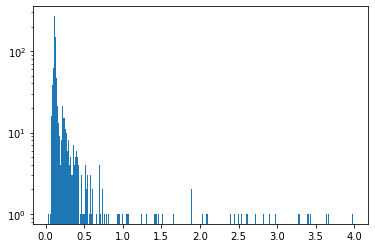

In [35]:
fig = plt.figure()
h = plt.hist(ili[ili < 4], bins=1000)
ax = plt.gca()
ax.set_yscale('log')

<div class="alert alert-block alert-success">

**Prompt 1.4.c:** Set the lick bout threshold based on where the histogram clips off (roughly)

</div>

In [36]:
lick_bout_threshold = 0.6

<div class="alert alert-block alert-success">

**Prompt 1.4.d:** (This step is not needed for what follows) Add the inter-lick intervals to the `licks` table. There is now one row fewer than needed, since the inter-lick interval is not defined for the very first lick: make that row either `inf` or `NaN`.

</div>

In [37]:
licks['time_from_last_lick'] = np.concatenate(([np.inf], ili))

<div class="alert alert-block alert-success">

**Prompt 1.4.e:** Create a `lick_bout` column in the `licks` table, to contain the "bout index" that each lick is part of: to compute the bout index, we need to increment a counter every time the inter-lick interval exceeds the lick bout threshold that we defined above. `np.cumsum` computes a cumulative sum, and can be used do this efficiently.

</div>

In [38]:
licks['lick_bout'] = 0
licks.loc[1:, 'lick_bout'] = np.cumsum((ili > lick_bout_threshold).astype(int))
# In the above, we can use loc, because the licks table uses the standard, sequential index starting from zero.
licks.head()

,timestamps,frame,time_from_last_lick,lick_bout
0,28.55104,88,inf,0
1,28.72504,99,0.17400,0
2,29.30011,133,0.57507,0
3,33.02635,357,3.72624,1
4,33.20237,367,0.17602,1


<div class="alert alert-block alert-success">

**Prompt 1.4.f:** Create a table with the timestamps of lick bouts, i.e., timestamps of the first lick in each bout. You could use a `groupby` to do this.

</div>

In [39]:
lick_bouts = licks[['timestamps', 'lick_bout']].groupby('lick_bout').agg('min')
inter_bout_interval = np.diff(lick_bouts['timestamps'])

<div class="alert alert-block alert-success">

**Prompt 1.4.g:** Check what the histogram of inter-bout intervals looks like (leaving out intervals >=1 minute in length)

</div>

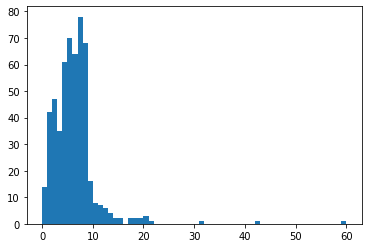

In [40]:
plt.figure()
_ = plt.hist(inter_bout_interval[inter_bout_interval < 60], bins=np.arange(61))